In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(168528, 109)



# Time to First Treatment

In [4]:

# Time to first treatment

# Initialize an empty list to store rows of data
rows_list = []

# Loop through the grouped data (grouped by session_uuid and time_group)
for (session_uuid, time_group), df1 in nu.get_session_groupby(extra_column='time_group'):
    
    # Get the logger version
    logger_version = df1.logger_version.unique().item()
    
    # Create a boolean mask for 'INJURY_TREATED' action type
    action_mask_series = (df1.action_type == 'INJURY_TREATED')
    
    # Check if there are any rows with 'INJURY_TREATED' action type
    if df1[action_mask_series].shape[0]:
        # Initialize a dictionary to store row data
        row_dict = {}
        
        # Store logger_version, session_uuid, and time_group
        row_dict['logger_version'] = logger_version
        row_dict['session_uuid'] = session_uuid
        row_dict['time_group'] = time_group
        
        # Calculate and add the time to first treatment
        first_treatment = df1[action_mask_series].elapsed_time.min()
        row_dict['first_treatment'] = first_treatment
        
        # Create a mask for the row with the first treatment
        mask_series = action_mask_series & (df1.elapsed_time == first_treatment)

        # Get the patient ID of the first treatment and add it
        patient_id = df1[mask_series].patient_id.squeeze()
        row_dict['patient_id'] = patient_id
        
        # Create a mask for rows with the same patient_id
        mask_series = (df1.patient_id == patient_id)
        
        # Calculate the time to the first notice and add it
        first_notice = df1[mask_series].elapsed_time.min()
        row_dict['first_notice'] = first_notice
        
        # Calculate the time to treatment by subtracting first_notice from first_treatment
        time_to_treatment = first_treatment - first_notice
        row_dict['time_to_treatment'] = time_to_treatment
        
        # Append the row dictionary to the list of rows
        rows_list.append(row_dict)

# Create a DataFrame from the list of row dictionaries
time_to_treatment_df = DataFrame(rows_list)

In [5]:

time_to_treatment_df.sort_values('time_to_treatment')

,logger_version,session_uuid,time_group,first_treatment,patient_id,first_notice,time_to_treatment
95,1.0,6d21f440-1c45-4c53-ad64-4edb92a94e25,1,28351,Mike_2 Root,17132,11219
62,1.0,446f0cb1-dceb-40f4-8bba-db5c07f67571,1,23918,Mike_3 Root,12296,11622
164,1.0,a0987257-801e-44c5-a1ad-81e0083bfa46,2,475326,Mike_2 Root,462662,12664
183,1.3,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,1,38762,Military Mike Jungle Combat_2_0 Root,22540,16222
109,1.0,724fdf45-3165-43b8-b9ca-dc07102d2886,13,5177762,Gary_3 Root,5159446,18316
...,...,...,...,...,...,...,...
140,1.0,89c48e7e-780f-4f1b-a846-fc0f4fd9841c,1,231815,Mike_3 Root,8454,223361
97,1.0,705ac61e-38b7-4b89-8778-4ea58bad18a6,1,260327,Lily_2 Root,28850,231477
247,1.0,e9632b3b-77f2-4f62-a778-5d6a4242aa3b,1,279389,Mike_3 Root,39026,240363
148,1.0,8f6097ce-795d-483a-a811-e6a5423bc59d,2,617330,Gloria_6 Root,376775,240555


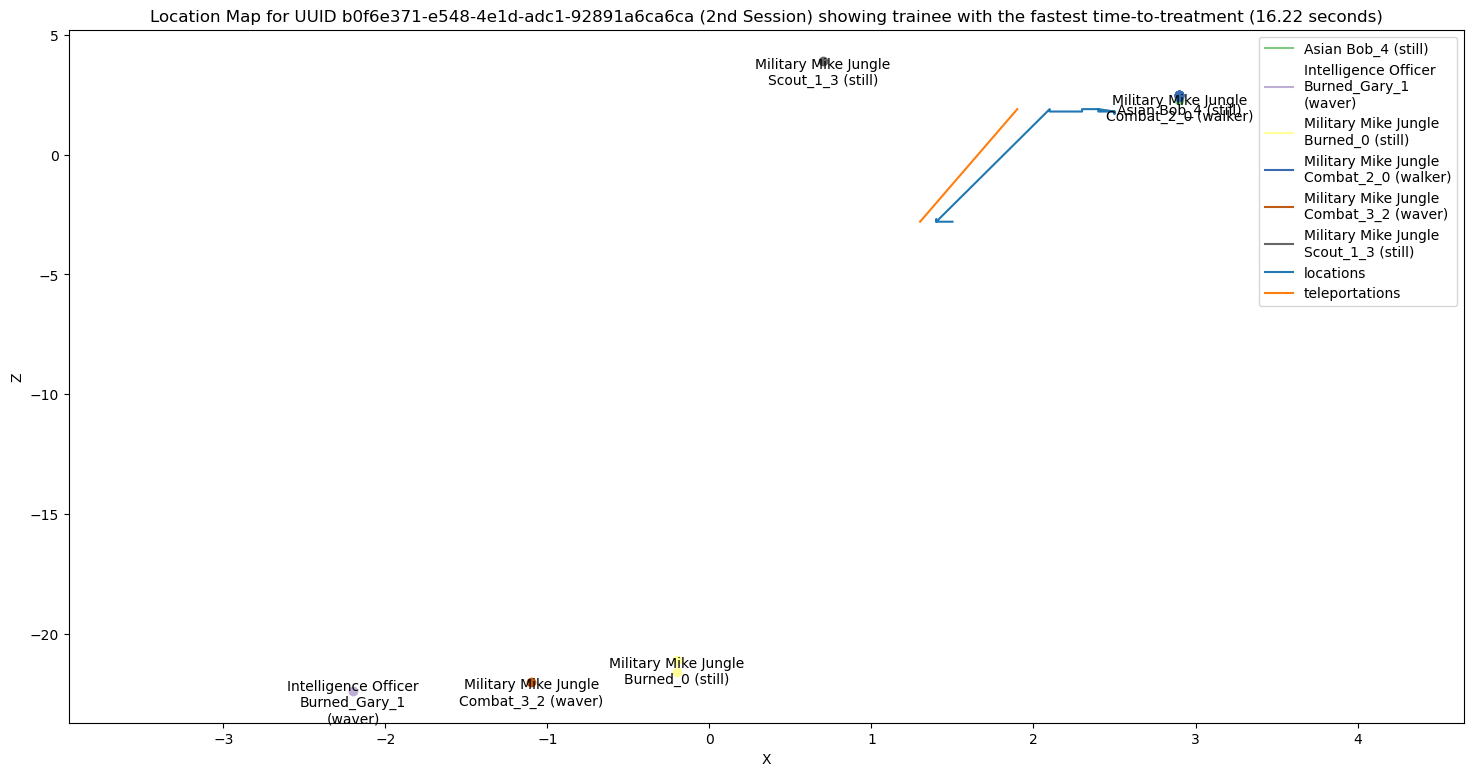

In [7]:

# Get time group with the fastest time to treatment, v1.3
mask_series = (time_to_treatment_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    time_to_treatment_df, 'time_to_treatment', mask_series=mask_series, is_ascending=True, humanize_type='precisedelta',
    title_str='fastest time-to-treatment', frvrs_logs_df=None, verbose=False
)

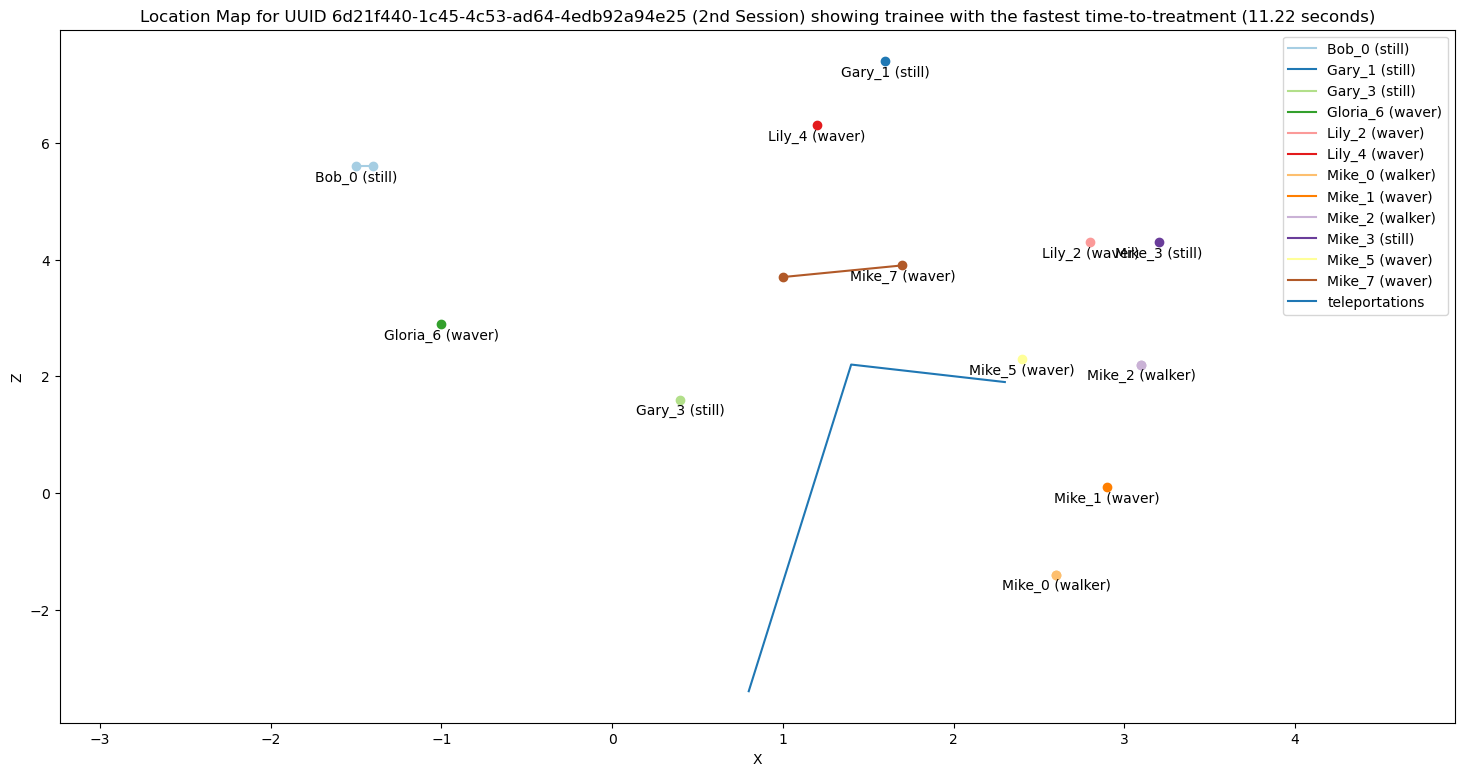

In [8]:

# Get time group with the fastest time to treatment, v1.0
mask_series = (time_to_treatment_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    time_to_treatment_df, 'time_to_treatment', mask_series=mask_series, is_ascending=True, humanize_type='precisedelta',
    title_str='fastest time-to-treatment', frvrs_logs_df=None, verbose=False
)

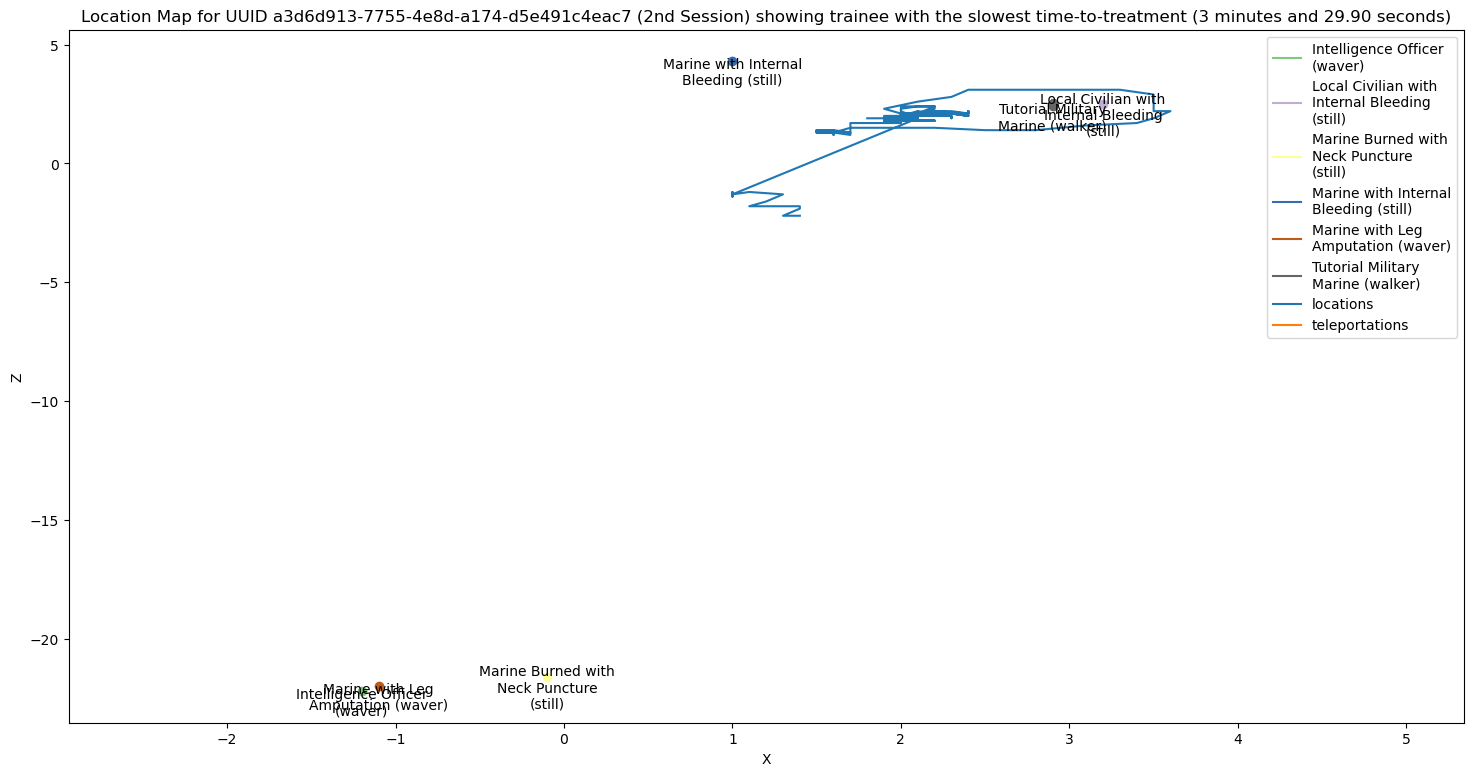

In [11]:

# Get time group with the slowest time to treatment, v1.3
mask_series = (time_to_treatment_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    time_to_treatment_df, 'time_to_treatment', mask_series=mask_series, is_ascending=False, humanize_type='precisedelta',
    title_str='slowest time-to-treatment', frvrs_logs_df=None, verbose=False
)

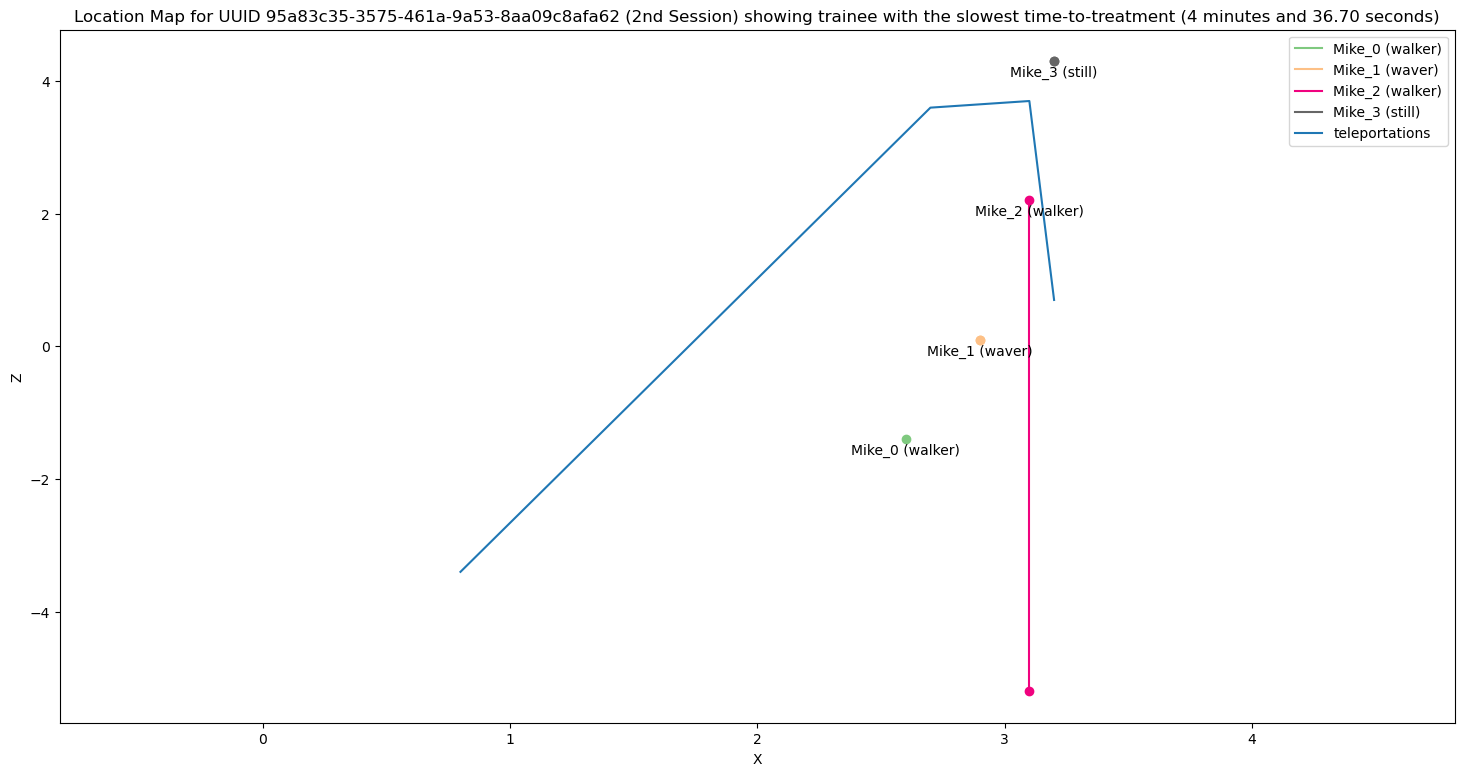

In [12]:

# Get time group with the slowest time to treatment, v1.0
mask_series = (time_to_treatment_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    time_to_treatment_df, 'time_to_treatment', mask_series=mask_series, is_ascending=False, humanize_type='precisedelta',
    title_str='slowest time-to-treatment', frvrs_logs_df=None, verbose=False
)